## 1. Import Libraries

In [1]:
#Import Libraries

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## 2. Load the training and testing dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [4]:
#Creating a new dataframe by combining train and test set, it will make feature engineering and imputation easy.
df = pd.concat([train_df, test_df], axis = 0)

## 3. Understanding data and dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.isna().mean()*100, 

(PassengerId     0.000000
 Survived       31.932773
 Pclass          0.000000
 Name            0.000000
 Sex             0.000000
 Age            20.091673
 SibSp           0.000000
 Parch           0.000000
 Ticket          0.000000
 Fare            0.076394
 Cabin          77.463713
 Embarked        0.152788
 dtype: float64,)

## 4.EDA

In [7]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: ylabel='Survived'>

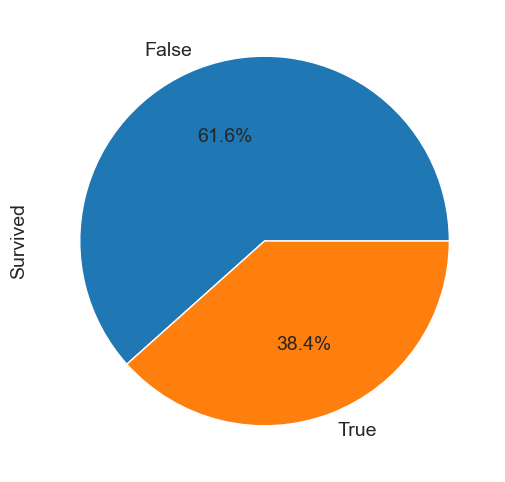

In [9]:
train_df['Survived'].value_counts().plot(kind = 'pie',labels=[False, True], autopct='%1.1f%%')

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='count'>

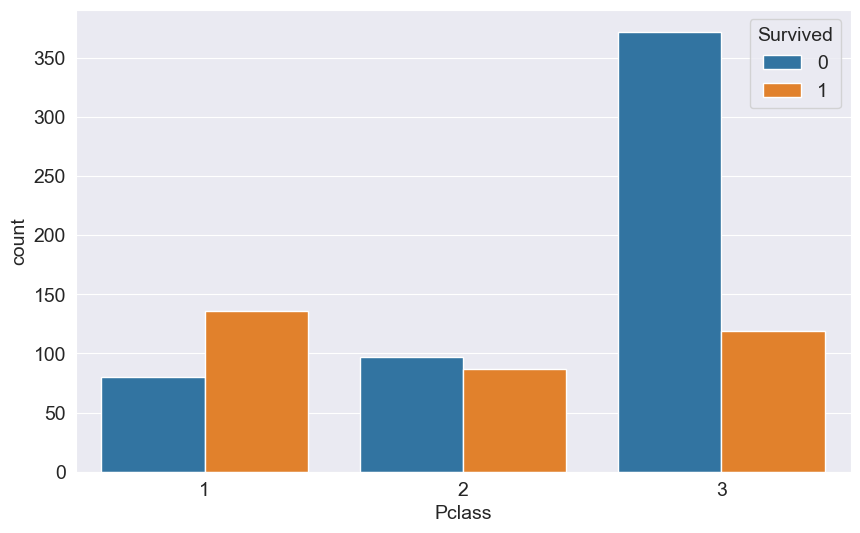

In [11]:
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived')

In [12]:
df.Name.nunique()

1307

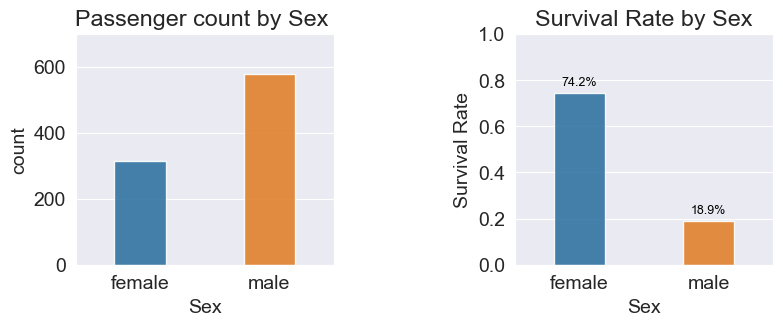

In [13]:
fig= plt.figure(figsize=(9,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="Sex", data=train_df, width= 0.4, alpha= 0.9, order=['female', 'male'], ax=ax1)
ax1.set_title("Passenger count by Sex ")
ax1.set_ylim([0, 700])


ax2= plt.subplot(1,2,2)
sex_survival_rate = train_df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(x='Sex', y='Survived', data=sex_survival_rate,  alpha= 0.9, width= 0.4, ax= ax2)
ax2.set_title('Survival Rate by Sex')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 1])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.7)
plt.show()

Text(0.5, 1.0, 'Box Plot')

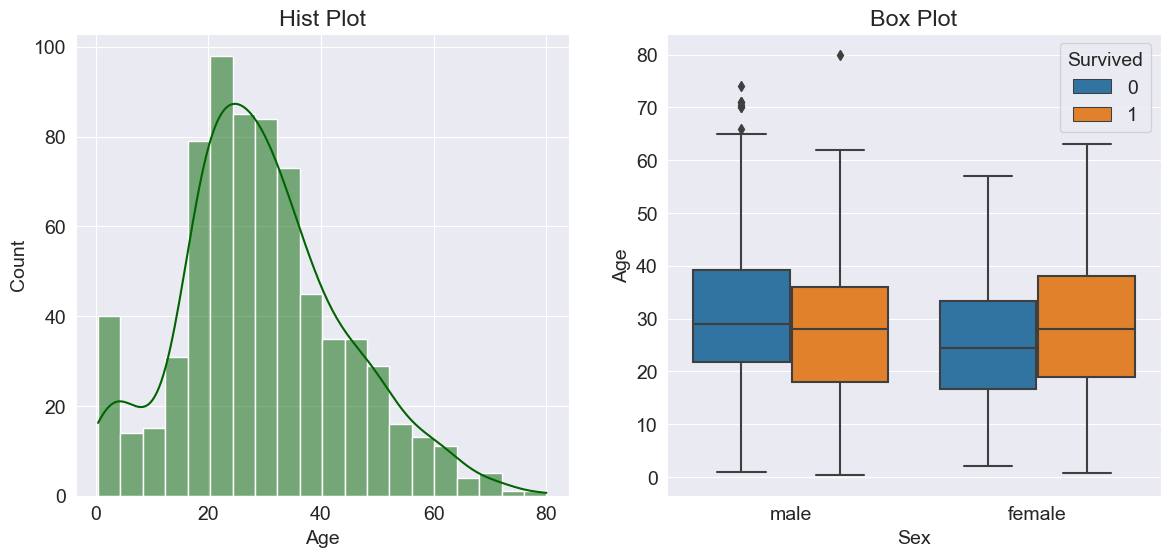

In [14]:
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(data = train_df, x = 'Age',color = 'darkgreen', kde = True)
plt.title("Hist Plot")
plt.subplot(122)
sns.boxplot(data =train_df, y = 'Age', x= 'Sex', hue = 'Survived')
plt.title("Box Plot")

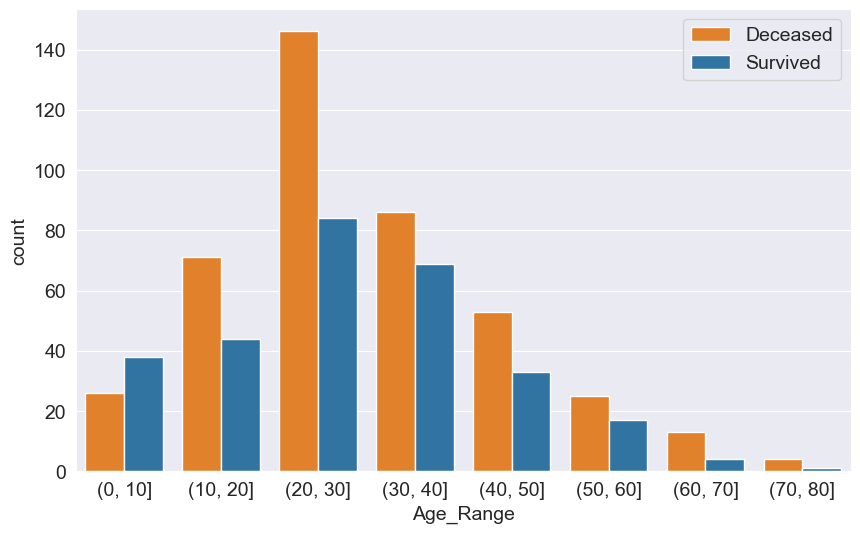

In [15]:
train_df['Age_Range'] = pd.cut(train_df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = train_df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

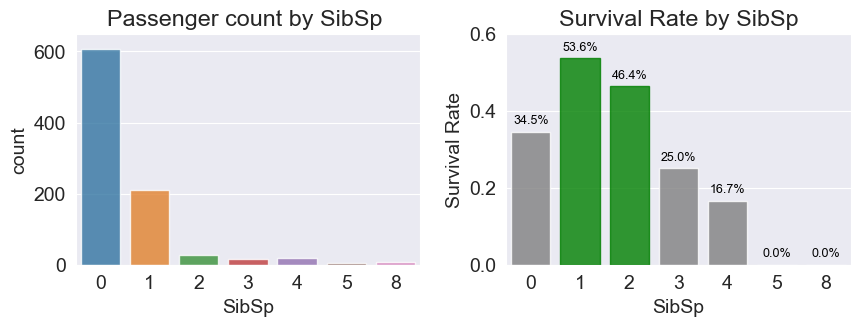

In [16]:
fig= plt.figure(figsize=(10,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="SibSp", data=train_df, alpha= 0.8, ax=ax1)
ax1.set_title("Passenger count by SibSp ")
ax1.set_ylim([0, 650])

ax2= plt.subplot(1,2,2)
sibsp_survival_rate = train_df.groupby('SibSp')['Survived'].mean().reset_index()
sns.barplot(x='SibSp', y='Survived', data=sibsp_survival_rate, alpha= 0.8, color='grey', ax= ax2)
for i in range(1,3):
    plt.gca().get_children()[i].set_color('g')
ax2.set_title('Survival Rate by SibSp')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.6])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()

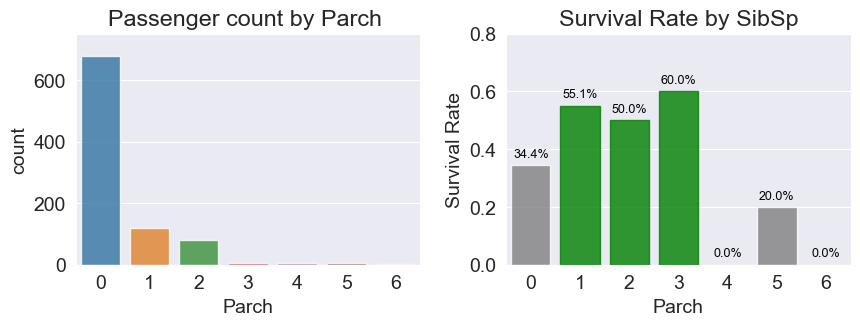

In [17]:
fig= plt.figure(figsize=(10,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="Parch", data=train_df, alpha= 0.8, ax=ax1)
ax1.set_title("Passenger count by Parch ")
ax1.set_ylim([0, 750])

ax2= plt.subplot(1,2,2)
sibsp_survival_rate = train_df.groupby('Parch')['Survived'].mean().reset_index()
sns.barplot(x='Parch', y='Survived', data=sibsp_survival_rate, alpha= 0.8, color='grey', ax= ax2)
for i in range(1,4):
    plt.gca().get_children()[i].set_color('g')
ax2.set_title('Survival Rate by SibSp')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.8])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()

In [18]:
print(df.Ticket.nunique())
df.Ticket.value_counts()

929


CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

<Axes: xlabel='Sex', ylabel='Fare'>

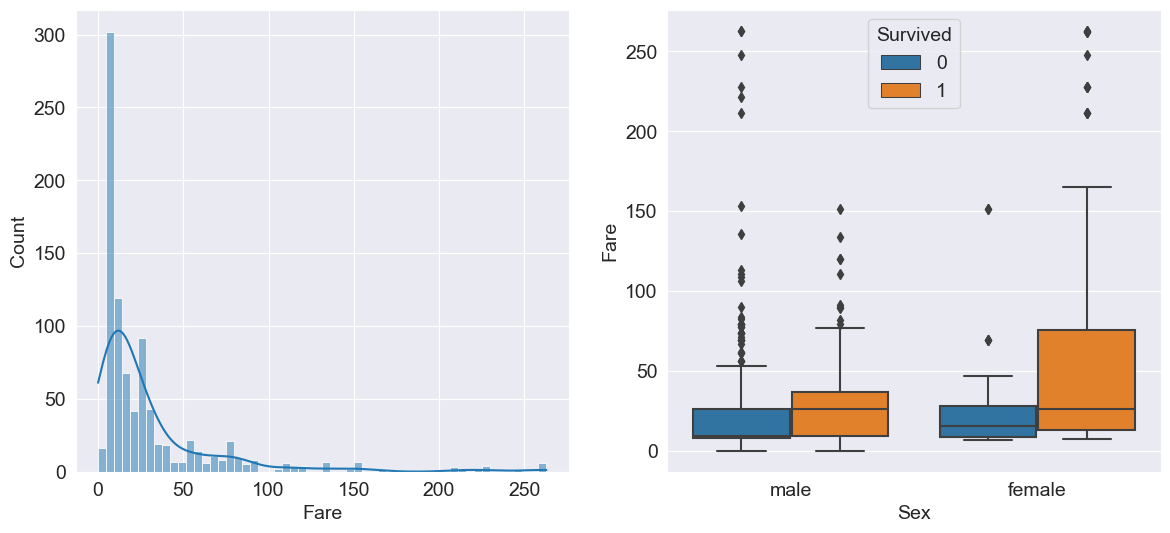

In [19]:
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(data = train_df[train_df['Fare']<500], x = 'Fare', kde = True)
plt.subplot(122)
sns.boxplot(data =train_df[train_df['Fare']<500], y = 'Fare', x= 'Sex', hue = 'Survived')

In [20]:
print(f'Null Values in Cabin column {df["Cabin"].isna().sum()}')
print(f'Duplicated Values in Cabin Column {df["Cabin"].duplicated().sum()}')

Null Values in Cabin column 1014
Duplicated Values in Cabin Column 1122


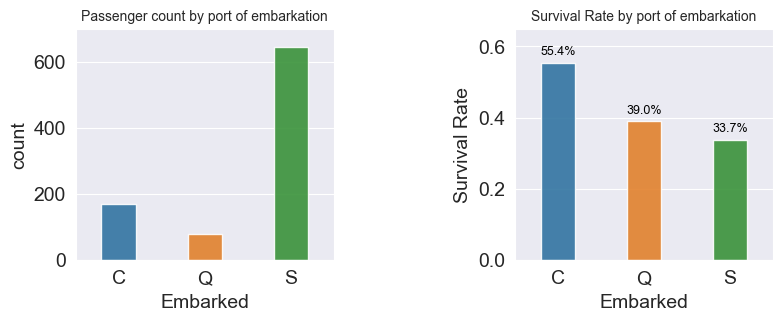

In [21]:
fig= plt.figure(figsize=(9,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="Embarked", data=train_df, width= 0.4, alpha= 0.9, order=['C', 'Q', 'S'], ax=ax1)
ax1.set_title("Passenger count by port of embarkation", fontsize=10)
ax1.set_ylim([0, 700])


ax2= plt.subplot(1,2,2)
Embarked_survival_rate = train_df.groupby('Embarked')['Survived'].mean().reset_index()
sns.barplot(x='Embarked', y='Survived', data=Embarked_survival_rate,  alpha= 0.9, width= 0.4, ax= ax2)
ax2.set_title('Survival Rate by port of embarkation', fontsize=10)
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.65])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.7)
plt.show()

<Axes: >

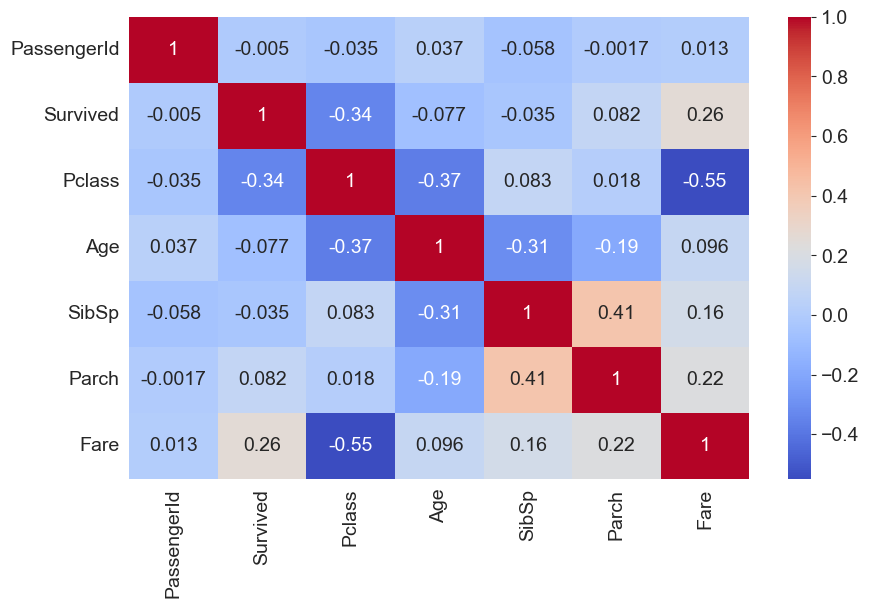

In [22]:
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')

In [23]:
target = df['Survived']
df = df.drop('Survived', axis = 1)

## 5. Data imputation

Text(0.5, 1.0, 'Number of missing values in the given features')

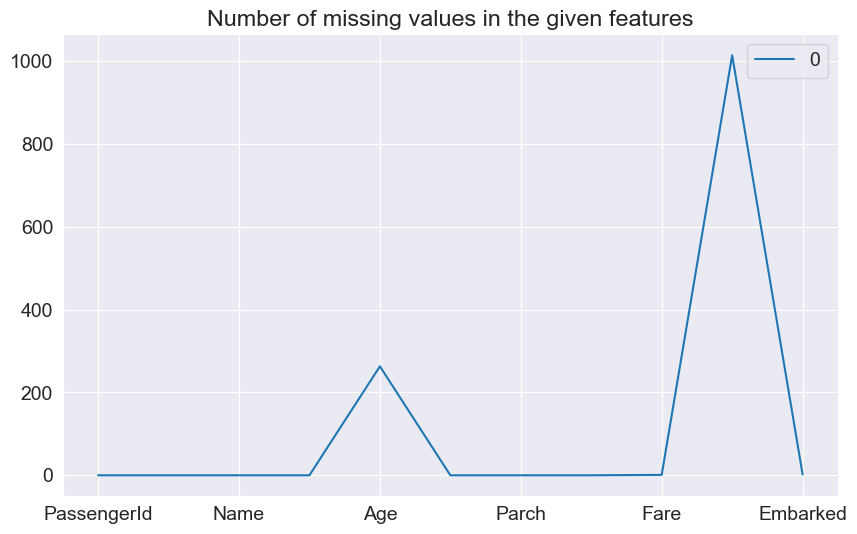

In [24]:
pd.DataFrame(df.isnull().sum()).plot.line().set_title("Number of missing values in the given features")

Text(0.5, 1.0, 'Age Distribution by Sex and Pclass')

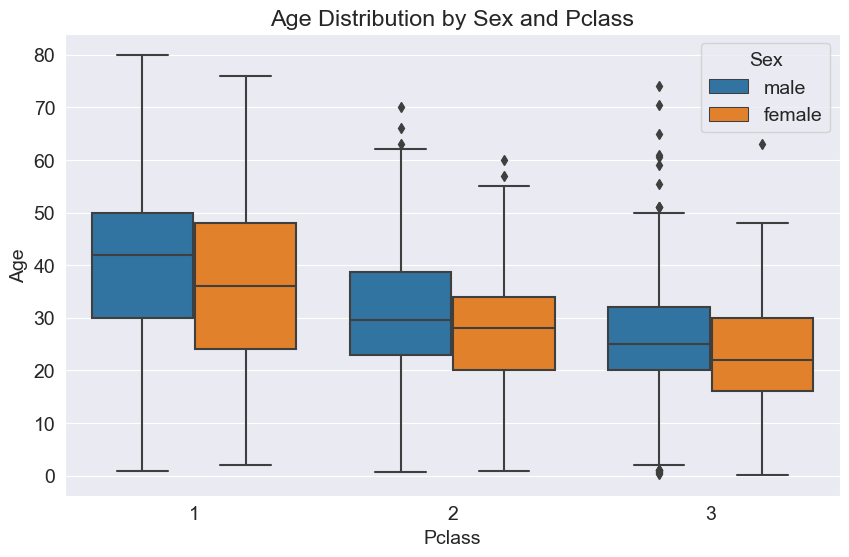

In [25]:
sns.boxplot(data = df, y = 'Age', x = 'Pclass', hue = 'Sex')
plt.title('Age Distribution by Sex and Pclass')

In [26]:
median_age = df.groupby(['Pclass','Sex']).median()['Age']
median_age

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [27]:
df['Age'] = df.apply(lambda x: median_age.loc[x['Pclass'], x['Sex']] if np.isnan(x['Age']) else x['Age'], axis = 1)

In [28]:
df['Embarked'].fillna(value = 'S', inplace = True)
df['Cabin_letter'] = df['Cabin'].str[:1]
df['Cabin_letter'].fillna(value = 'NA', inplace = True)
df.drop('Cabin', axis = 1, inplace = True)

<Axes: >

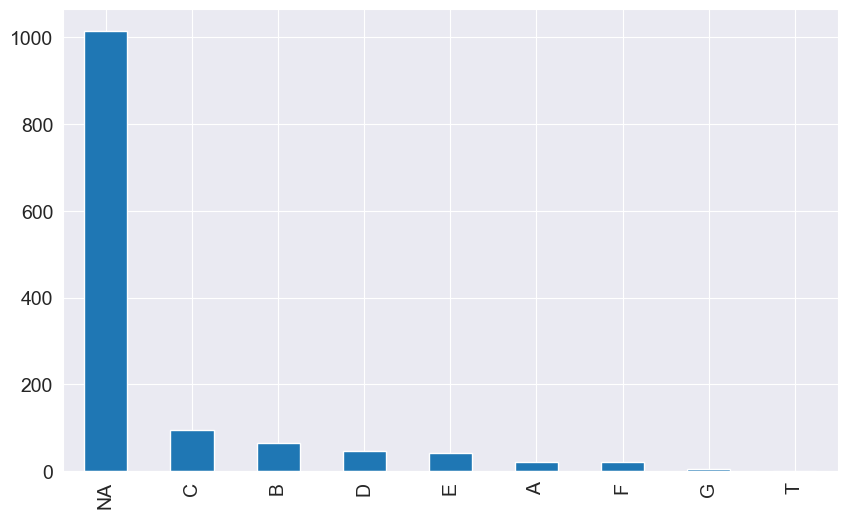

In [29]:
df['Cabin_letter'].value_counts().plot(kind = 'bar')

In [30]:
df['Fare'].fillna(value = df['Fare'].median(), inplace = True)

In [31]:
df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Cabin_letter    0
dtype: int64

In [32]:
df_copy = df.copy() 

In [33]:
df.drop(['PassengerId'],axis = 1, inplace = True)

In [34]:
df['Sex'] = np.where(df['Sex']=='female',1,0)

In [35]:
df['family_size'] = df['SibSp']+df['Parch'] +1

In [36]:
df['family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: family_size, dtype: int64

In [37]:
df['family_size']=df['family_size'].map({1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small',
                                               5: 'Medium', 6: 'Medium', 7: 'Large',
                                               8: 'Large', 11: 'Large'})

In [38]:
group = df.groupby(['Ticket'])[['family_size']].count().rename(columns={'family_size': 'Count'})
df['Group_Size']=df['Ticket'].apply(lambda x: group.loc[x, 'Count'])

In [39]:
df.sample(4)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,family_size,Group_Size
144,2,"Andrew, Mr. Edgardo Samuel",0,18.0,0,0,231945,11.5000,S,NA,Alone,1
442,3,"Petterson, Mr. Johan Emil",0,25.0,1,0,347076,7.7750,S,NA,Small,1
406,2,"Ware, Mr. William Jeffery",0,23.0,1,0,28666,10.5000,S,NA,Small,1
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",1,36.0,1,0,PC 17604,82.1708,C,NA,Small,2


<Axes: xlabel='count', ylabel='Title'>

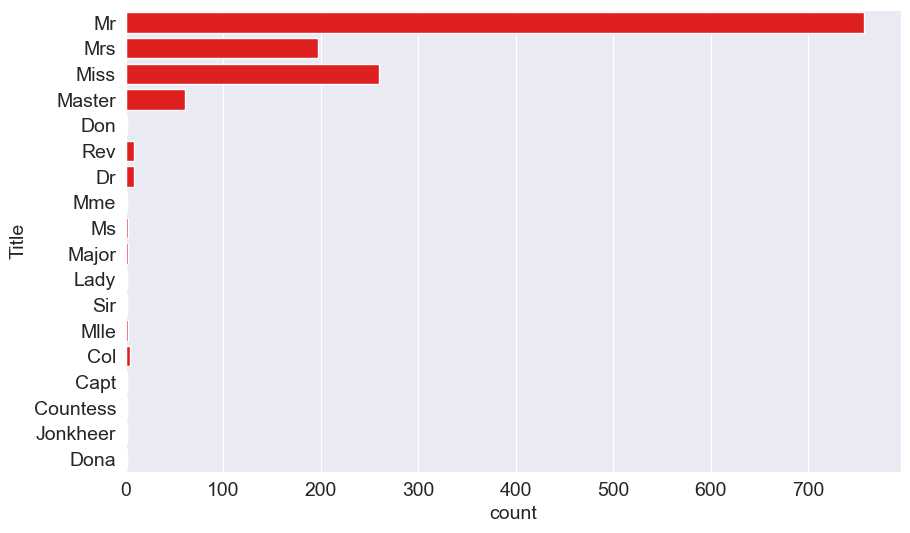

In [40]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

sns.countplot(data = df, y = 'Title',color = 'red')

In [41]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [42]:
df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Ms',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], 'rare')
df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
df['Title'] = df['Title'].replace('Ms','Miss')

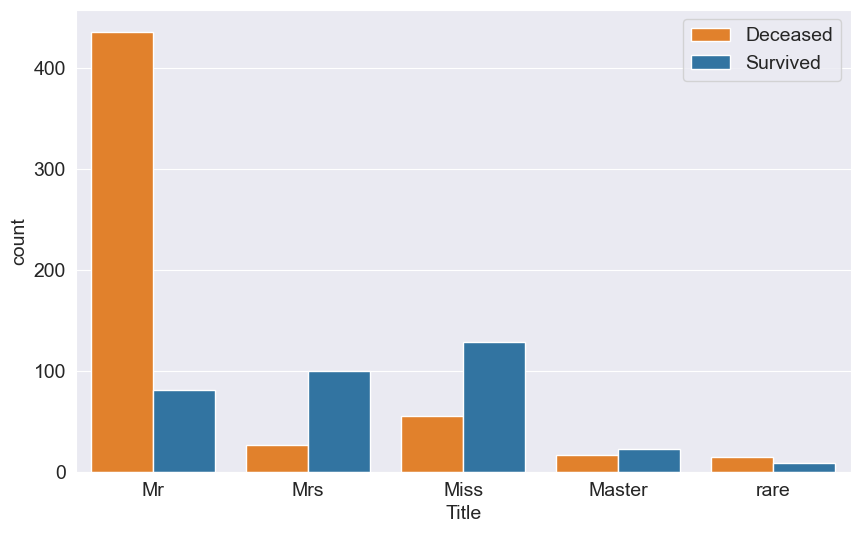

In [43]:
sns.countplot(data = df.iloc[:train_df.shape[0],:], x = 'Title', hue=target[:train_df.shape[0]],
              palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

In [44]:
title_mapping = {"Mr": 1, "rare": 2, "Master": 3, "Miss": 4, "Mrs": 5}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [45]:
df.sample(4)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,family_size,Group_Size,Title
95,3,"Tenglin, Mr. Gunnar Isidor",0,25.0,0,0,350033,7.7958,S,NA,Alone,1,1
438,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,S,C,Medium,6,1
242,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.5000,S,NA,Alone,1,1
294,3,"Mineff, Mr. Ivan",0,24.0,0,0,349233,7.8958,S,NA,Alone,1,1


In [46]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])

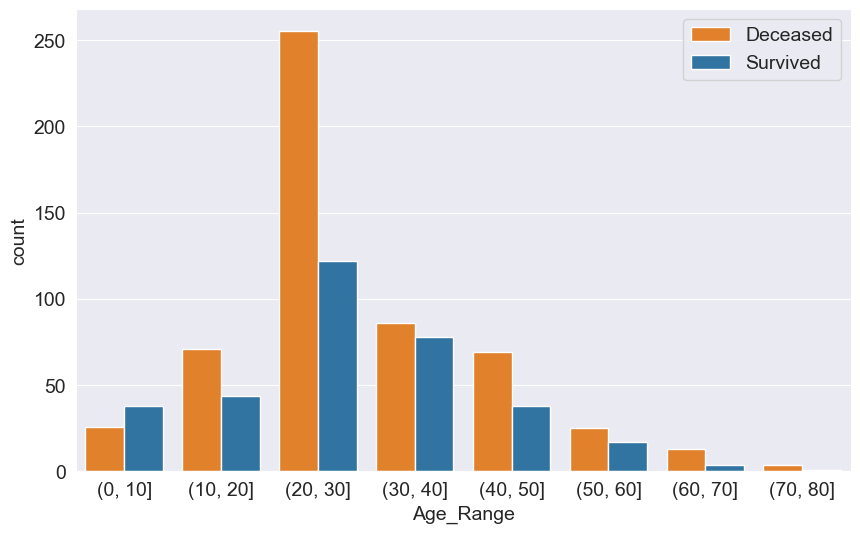

In [47]:
sns.countplot(data = df.iloc[:train_df.shape[0],:], x = 'Age_Range', hue=target[:train_df.shape[0]],
              palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

In [48]:
Q1,Q2,Q3 = np.percentile(df.Fare,[25,50,75])
IQR = 1.5*(Q3-Q1)
df['Fare_bins'] = pd.cut(df.Fare,[0,Q1,Q2,Q3,IQR,np.inf])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(0.0, 7.896]'),
  Text(1, 0, '(7.896, 14.454]'),
  Text(2, 0, '(14.454, 31.275]'),
  Text(3, 0, '(31.275, 35.069]'),
  Text(4, 0, '(35.069, inf]')])

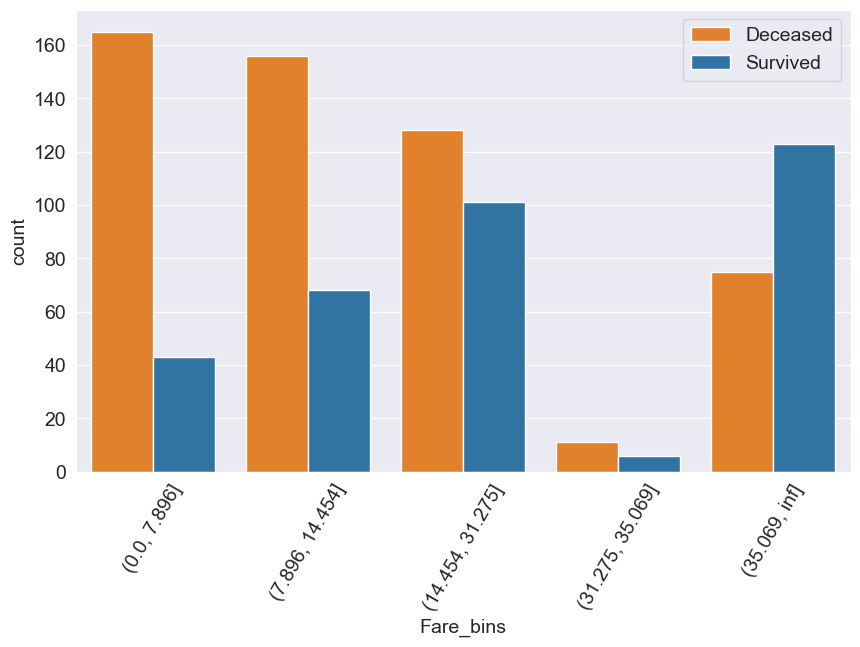

In [49]:
sns.countplot(data = df.iloc[:train_df.shape[0],:], x = 'Fare_bins', hue=target[:train_df.shape[0]],
             palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
plt.xticks(rotation = 60)

In [50]:
df = pd.get_dummies(df, columns = ['Embarked','Cabin_letter', 'Age_Range', 'family_size','Fare_bins'])

In [51]:
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Group_Size', 'Title', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_letter_A', 'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D',
       'Cabin_letter_E', 'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_NA',
       'Cabin_letter_T', 'Age_Range_(0, 10]', 'Age_Range_(10, 20]',
       'Age_Range_(20, 30]', 'Age_Range_(30, 40]', 'Age_Range_(40, 50]',
       'Age_Range_(50, 60]', 'Age_Range_(60, 70]', 'Age_Range_(70, 80]',
       'family_size_Alone', 'family_size_Large', 'family_size_Medium',
       'family_size_Small', 'Fare_bins_(0.0, 7.896]',
       'Fare_bins_(7.896, 14.454]', 'Fare_bins_(14.454, 31.275]',
       'Fare_bins_(31.275, 35.069]', 'Fare_bins_(35.069, inf]'],
      dtype='object')

In [52]:
df.drop(['Name','Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis = 1, inplace = True)

In [53]:
df.drop(['Cabin_letter_C','Age_Range_(70, 80]','family_size_Large','Fare_bins_(35.069, inf]',
         'Embarked_C'], axis = 1, inplace = True)
df.shape

(1309, 28)

In [54]:
df.columns = df.columns.str.replace(r'[(),\[\] ]', '', regex=True)
df.columns

Index(['Pclass', 'Sex', 'Group_Size', 'Title', 'Embarked_Q', 'Embarked_S',
       'Cabin_letter_A', 'Cabin_letter_B', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_NA', 'Cabin_letter_T',
       'Age_Range_010', 'Age_Range_1020', 'Age_Range_2030', 'Age_Range_3040',
       'Age_Range_4050', 'Age_Range_5060', 'Age_Range_6070',
       'family_size_Alone', 'family_size_Medium', 'family_size_Small',
       'Fare_bins_0.07.896', 'Fare_bins_7.89614.454', 'Fare_bins_14.45431.275',
       'Fare_bins_31.27535.069'],
      dtype='object')

In [55]:
training_data = df.iloc[:train_df.shape[0],:]
X_test = df.iloc[train_df.shape[0]:,:]

In [56]:
training_data.shape, X_test.shape

((891, 28), (418, 28))

In [57]:
y = target.dropna()


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(training_data, y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 28), (179, 28), (712,), (179,))

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
alg = LogisticRegression()

In [61]:
alg.fit(X_train,y_train)

LogisticRegression()

In [62]:
alg.predict(X_val)

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1.])

In [63]:
alg.score(X_train,y_train)

0.8328651685393258

In [64]:
alg.score(X_val,y_val)

0.8212290502793296

In [65]:
ypred = alg.predict(training_data)
ypred

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [66]:
alg.score(training_data, ypred)

1.0

In [67]:
np.savetxt("pred.csv", ypred)